# What's the Weather Like?

## Analysis
#### Observed Trend 1: It is hotter at the equator; however, the northern hemisphere is currently warmer than the southern hemisphere

#### Observed Trend 2: The northern hemisphere appears to have some of the coldest temperatures as well which may be due in part to a higher concentration. More cities with greater temperature diversity.

#### Observed Trend 3: Humidity, Cloudiness, and Wind Speed are uniform across the northern and southern hemispheres. Humidity is high, wind is low and cloudiness is evenly dispersed across the board. 


In [1]:
# Dependencies

from citipy import citipy
import seaborn
import pandas as pd
import numpy as np
import requests as req
import json
import random
import time
import matplotlib.pyplot as plt
import datetime
import csv
import os

In [2]:
# Save config information.
#api_key = "25bc90a1196e6f153eece0bc0b0fc9eb" #Amed's key
api_key = "924783bda048569443e49dd6a03e5591"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #Fahrenheit 

# Generate Cities List

In [3]:
# grab random coordinates an find the closest cities
sample_size = 600

coordinates = [((random.randint(-90, 90)),(random.randint(-180, 180))) for _ in range (sample_size)]

city_list = []

cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
    city_names = citipy.nearest_city(lat, lon).city_name

#create a list of random cities    
    city_list.append(city_names)

#city_list 

# Perform API Calls

In [4]:
# Build partial query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# List for holding the latitude and temperature

city_data = []
cloudiness_data = []
country_data = []
date_data = []
humidity_data = []
lat_data = []
lon_data = []
max_temp_data = []
wind_speed_data = []

counter = 0

#clear/ prep csv file for query log
output_path = os.path.join("Weather_Query_log")
with open(output_path, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile, delimiter=',')

for city in city_list:
    
    try:
        print("----------------------")
        print("Now logging city # " + str(counter))
        print(query_url + city)
        response = req.get(query_url + city).json()
        
        # Specify the file to write to
        output_path = os.path.join("Weather_Query_log")

        # Open the file using "write" mode. Specify the variable to hold the contents
        with open(output_path, 'a', newline='') as csvfile:

            # Initialize csv.writer
            csvwriter = csv.writer(csvfile, delimiter=',')

            # Write the first row (column headers)
            csvwriter.writerow(['----------------------'])
            csvwriter.writerow(["Now logging city # " + str(counter)])
            csvwriter.writerow([query_url + city]) 
            #csvwriter.writerow([])
            
        city_data.append(response.get("name"))
        cloudiness_data.append(response.get("clouds").get("all"))
        country_data.append(response.get("sys").get("country"))
        date_data.append(response.get("dt"))
        humidity_data.append(response.get("main").get("humidity"))
        lat_data.append(response.get("coord").get("lat"))
        lon_data.append(response.get("coord").get("lon"))
        max_temp_data.append(response.get("main").get("temp_max"))
        wind_speed_data.append(response.get("wind").get("speed"))

        counter = counter + 1
        if counter % 59 == 0:
            time.sleep(60)
    except:
        print("Skipping this...")

weather_data = {"City" : city_data,
                "Cloudiness": cloudiness_data,
                "Country": country_data,
                "Date": date_data,
                "Humidity": humidity_data,
                "Lat": lat_data,
                "Lng": lon_data,
                "Max Temp": max_temp_data,
                "Wind Speed": wind_speed_data,
                }

weather_data = pd.DataFrame(weather_data)

date_stamp = str(weather_data.iloc[0,3])
date_stamp = datetime.datetime.fromtimestamp(int(date_stamp)).strftime('%m-%d-%Y')

weather_data.count()

----------------------
Now logging city # 0
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=trairi
----------------------
Now logging city # 1
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=busselton
----------------------
Now logging city # 2
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=hobart
----------------------
Now logging city # 3
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=atuona
----------------------
Now logging city # 4
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=baculin
----------------------
Now logging city # 5
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=mys shmidta
----------------------
Now logging city # 6
http://api.openweatherm

----------------------
Now logging city # 53
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=grand river south east
----------------------
Now logging city # 54
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=belushya guba
----------------------
Now logging city # 55
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=kapaa
----------------------
Now logging city # 56
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=bluff
----------------------
Now logging city # 57
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=banmo
----------------------
Now logging city # 58
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=bargal
----------------------
Now logging city # 59
http:

----------------------
Now logging city # 108
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=necochea
----------------------
Now logging city # 109
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=narsaq
----------------------
Now logging city # 110
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=kichmengskiy gorodok
----------------------
Now logging city # 111
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=boca do acre
----------------------
Now logging city # 112
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=cape town
----------------------
Now logging city # 113
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=bredasdorp
----------------------
Now logging 

----------------------
Now logging city # 160
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=barkot
----------------------
Now logging city # 161
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=visby
----------------------
Now logging city # 162
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=labutta
----------------------
Now logging city # 163
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=arraial do cabo
----------------------
Now logging city # 164
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=bredasdorp
----------------------
Now logging city # 165
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=atuona
----------------------
Now logging city # 166
http:

----------------------
Now logging city # 214
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=castro
----------------------
Now logging city # 215
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=beira
----------------------
Now logging city # 216
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=castro
----------------------
Now logging city # 217
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=smithers
----------------------
Now logging city # 218
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=constitucion
----------------------
Now logging city # 219
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=rungata
----------------------
Now logging city # 220
http://api

----------------------
Now logging city # 266
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=rovaniemi
----------------------
Now logging city # 267
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=illoqqortoormiut
----------------------
Now logging city # 268
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=port alfred
----------------------
Now logging city # 269
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=albany
----------------------
Now logging city # 270
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=larap
----------------------
Now logging city # 271
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=longyearbyen
----------------------
Now logging city #

----------------------
Now logging city # 319
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=kloulklubed
----------------------
Now logging city # 320
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=amderma
----------------------
Now logging city # 321
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=rikitea
----------------------
Now logging city # 322
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=vaini
----------------------
Now logging city # 323
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=mys shmidta
----------------------
Now logging city # 324
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=rikitea
----------------------
Now logging city # 325
http:/

----------------------
Now logging city # 372
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=kodiak
----------------------
Now logging city # 373
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=narsaq
----------------------
Now logging city # 374
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=puerto ayora
----------------------
Now logging city # 375
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=thompson
----------------------
Now logging city # 376
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=puerto ayora
----------------------
Now logging city # 377
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=sabang
----------------------
Now logging city # 378
http

----------------------
Now logging city # 426
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=yellowknife
----------------------
Now logging city # 427
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=codrington
----------------------
Now logging city # 428
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=baykit
----------------------
Now logging city # 429
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=vaini
----------------------
Now logging city # 430
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=hermanus
----------------------
Now logging city # 431
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=katsuura
----------------------
Now logging city # 432
http:/

----------------------
Now logging city # 480
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=sentyabrskiy
----------------------
Now logging city # 481
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=east london
----------------------
Now logging city # 482
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=cape town
----------------------
Now logging city # 483
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=rawannawi
----------------------
Now logging city # 484
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=zambezi
----------------------
Now logging city # 485
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=nikolskoye
----------------------
Now logging city # 

----------------------
Now logging city # 533
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=tiksi
----------------------
Now logging city # 534
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=mahebourg
----------------------
Now logging city # 535
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=albany
----------------------
Now logging city # 536
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=hobart
----------------------
Now logging city # 537
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=mantua
----------------------
Now logging city # 538
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=hami
----------------------
Now logging city # 539
http://api.openwea

----------------------
Now logging city # 585
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=codrington
----------------------
Now logging city # 586
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=georgetown
----------------------
Now logging city # 587
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=hervey bay
----------------------
Now logging city # 588
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=bluff
----------------------
Now logging city # 589
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=albany
----------------------
Now logging city # 590
http://api.openweathermap.org/data/2.5/weather?appid=924783bda048569443e49dd6a03e5591&units=imperial&q=mastic beach
----------------------
Now logging city # 591
h

City          600
Cloudiness    600
Country       600
Date          600
Humidity      600
Lat           600
Lng           600
Max Temp      600
Wind Speed    600
dtype: int64

In [5]:
weather_data.head()

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0     Trairi           0      BR  1505487152       100  -3.28  -39.27   
1  Busselton           0      AU  1505487152       100 -33.65  115.33   
2     Hobart          75      AU  1505485800        56 -42.88  147.33   
3     Atuona          92      PF  1505487152       100  -9.80 -139.03   
4    Baculin          44      PH  1505487152       100   7.45  126.58   

   Max Temp  Wind Speed  
0     79.79       25.55  
1     59.99        7.43  
2     44.60       17.22  
3     80.15       19.17  
4     77.99        3.40

# Latitude vs Temperature Plot

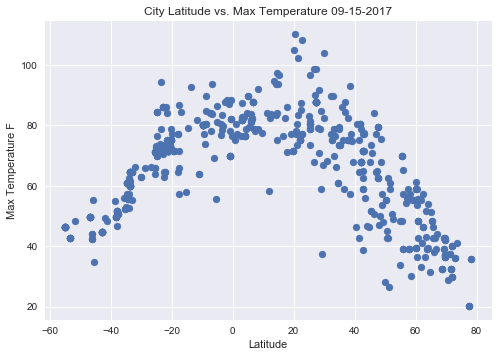

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature" + " " + date_stamp)
plt.ylabel("Max Temperature F")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

# Latitude vs. Humidity Plot

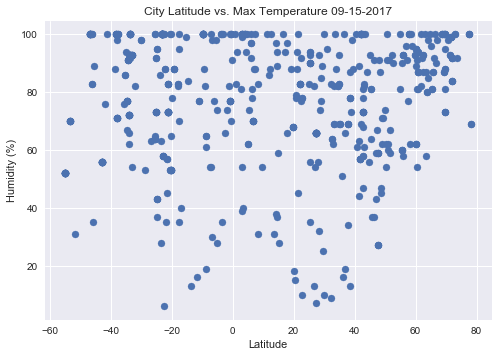

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature" + " " + date_stamp)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness Plot

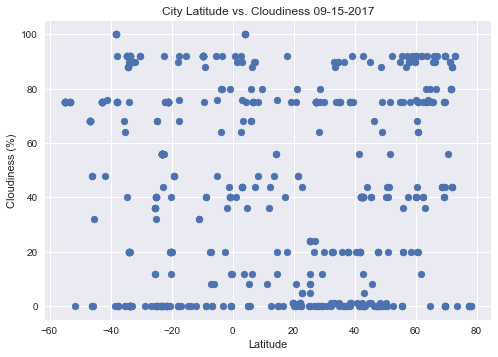

In [8]:
# Build a scatter plot for atitude vs. Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness" + " " + date_stamp)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

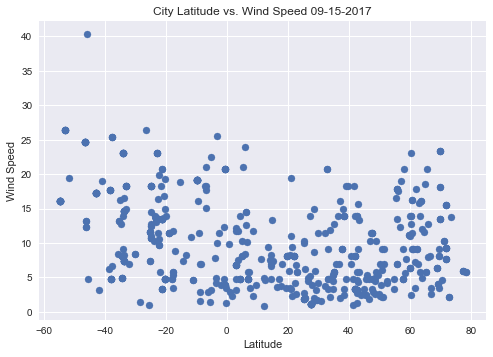

In [9]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed" + " " + date_stamp)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

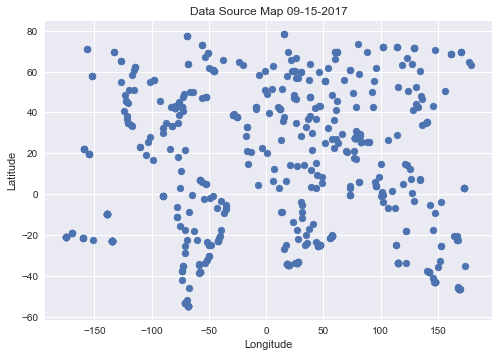

In [10]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data["Lng"], weather_data["Lat"], marker="o")

# Incorporate the other graph properties
plt.title("Data Source Map" + " " + date_stamp)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)

# Save the figure
plt.savefig("Data Source Map.png")

# Show plot
plt.show()